In [3]:
import numpy as np
import scipy 
import os
from matplotlib import pyplot as plt 

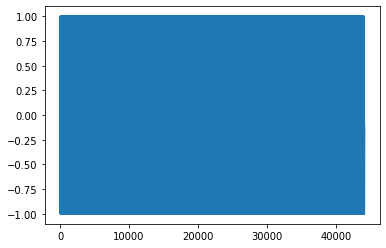

In [114]:
#from scipy.io import wavfile
#fs_wav, data_wav = wavfile.read("./data/filename.wav")

f1=441
f2=882
t=1
fs=44100
samples1=np.arange(t * 44100)
samples2=np.arange(t * 44100)
sig_a=np.sin(2*np.pi*f1*samples1/fs)
sig_b=np.sin(2*np.pi*f2*samples2/fs)
sig=np.append(sig_a,sig_b)
samples=np.append(samples1,samples2)

#plt.title("Matplotlib demo") 
#plt.xlabel("x axis caption") 
#plt.ylabel("y axis caption") 
plt.plot(samples,sig)
plt.show()

In [132]:
def block_audio(x,blockSize,hopSize,fs):
    #Returns a matrix [numblocks * blocksize] and starttimeinsecs
    a=1
    file_length=x.shape[0]
    numBlocks = np.floor((file_length-blockSize)/hopSize + 1).astype(int) # throws error if not cast as int
    numZeroes= hopSize-(file_length%hopSize)# file_length-[(hopSize*numBlocks) ]
    x=np.append(x,np.zeros(numZeroes))
    i=0
    lst=[]
    ts=[]
    for blk in range(0,numBlocks):
        if i == 0:
            start = 0
            i=i+1
        end = start + blockSize
        lst.append(x[start:end])
        #print(start)
        ts.append(start/fs)
        start = start + hopSize
        end = end + hopSize
        out=np.array(lst)
        time=np.array(ts)
    return(out,time)


In [111]:
import pyACA
a=pyACA.ToolBlockAudio(np.ones(file_length),1024,512)
a.shape

(19, 1024)

In [128]:
file_length=10241
blockSize=1024
hopSize=512
fs=128


In [133]:
a,ts=block_audio(np.ones(file_length),blockSize, hopSize, fs)

In [186]:
def comp_acf(inputVector, bIsNormalized=False):
    correl=[]
    for block in inputVector:
        #print(block)
        z=np.zeros(block.shape[0])
        x=np.append(block,z)
        start=0
        for i in range(0,block.shape[0]):# Offset start of x by j samples
            start = i
            end = start + block.shape[0]
            #print(f"start - {start} end - {end}")
            y=x[start:end]
            #print(y)
            corr = np.dot(y,block)
            #print(corr)
            correl.append(corr)
    return np.array(correl)
        

In [175]:
inp = np.vstack((np.ones(1024),np.ones(1024)))

1024.0
1023.0
1022.0
1021.0
1020.0
1019.0
1018.0
1017.0
1016.0
1015.0
1014.0
1013.0
1012.0
1011.0
1010.0
1009.0
1008.0
1007.0
1006.0
1005.0
1004.0
1003.0
1002.0
1001.0
1000.0
999.0
998.0
997.0
996.0
995.0
994.0
993.0
992.0
991.0
990.0
989.0
988.0
987.0
986.0
985.0
984.0
983.0
982.0
981.0
980.0
979.0
978.0
977.0
976.0
975.0
974.0
973.0
972.0
971.0
970.0
969.0
968.0
967.0
966.0
965.0
964.0
963.0
962.0
961.0
960.0
959.0
958.0
957.0
956.0
955.0
954.0
953.0
952.0
951.0
950.0
949.0
948.0
947.0
946.0
945.0
944.0
943.0
942.0
941.0
940.0
939.0
938.0
937.0
936.0
935.0
934.0
933.0
932.0
931.0
930.0
929.0
928.0
927.0
926.0
925.0
924.0
923.0
922.0
921.0
920.0
919.0
918.0
917.0
916.0
915.0
914.0
913.0
912.0
911.0
910.0
909.0
908.0
907.0
906.0
905.0
904.0
903.0
902.0
901.0
900.0
899.0
898.0
897.0
896.0
895.0
894.0
893.0
892.0
891.0
890.0
889.0
888.0
887.0
886.0
885.0
884.0
883.0
882.0
881.0
880.0
879.0
878.0
877.0
876.0
875.0
874.0
873.0
872.0
871.0
870.0
869.0
868.0
867.0
866.0
865.0
864.0
863.0
862

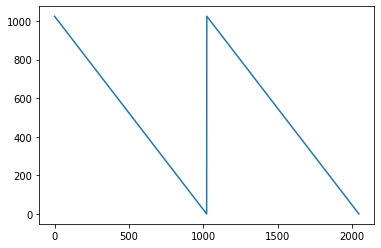

In [187]:
my_correlation=comp_acf(inp)
plt.plot(my_correlation)

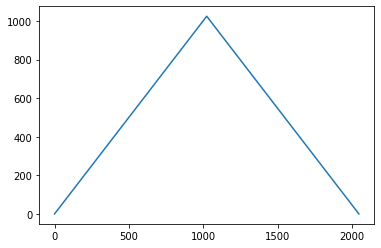

In [179]:
c=scipy.signal.correlate(inp[0],inp[1])
plt.plot(c)

In [191]:
my_correlation.shape

(2048,)

In [192]:
c.shape

(2047,)